In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
sales_data = pd.read_csv('/content/train_XnW6LSF.csv')
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [95]:
sales_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [96]:
total_missing_value_per = ((sales_data.isnull().sum()).sum()/ sales_data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_missing_value_per,2)}%')
missing_percentages = sales_data.isnull().sum()/ len(sales_data) * 100 

print(missing_percentages)

The total percentage of missing data is 45.44%
Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [97]:
class_mean = sales_data.groupby('Item_Type')['Item_Weight'].mean()
print(class_mean)

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64


In [98]:

for index, row in sales_data.iterrows():
    if pd.isnull(row['Item_Weight']):
        class_value = row['Item_Type']
        if class_value in class_mean:
            sales_data.at[index, 'Item_Weight'] = class_mean[class_value]

In [99]:
sales_data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [100]:
categorical_column = 'Outlet_Size'
specific_column = 'Item_Type'

# Calculate mode values for the categorical column based on the specific column
mode_values = sales_data.groupby(specific_column)[categorical_column].apply(lambda x: x.mode()[0])


In [101]:

# Calculate mode values for the categorical column based on the specific column
mode_values = sales_data.groupby(specific_column)[categorical_column].apply(lambda x: x.mode()[0])
for index, row in sales_data.iterrows():
    # Check if the categorical column has a null value
    if pd.isnull(row[categorical_column]):
        specific_value = row[specific_column]
        # Fill null value with the mode value for the respective specific value
        if specific_value in mode_values:
            sales_data.at[index, categorical_column] = mode_values[specific_value]

In [102]:
sales_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [103]:
sales_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [104]:
sales_data['Outlet_Establishment_Year'] = sales_data['Outlet_Establishment_Year'].astype('object')
sales_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [105]:
sales_data.describe()


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,2181.288914
std,4.232804,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.310000,0.026989,93.826500,834.247400
50%,12.867061,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [106]:
sales_data['Item_Visibility'] = sales_data['Item_Visibility'].replace(0.000000, 0.003574698)

(8523, 12)


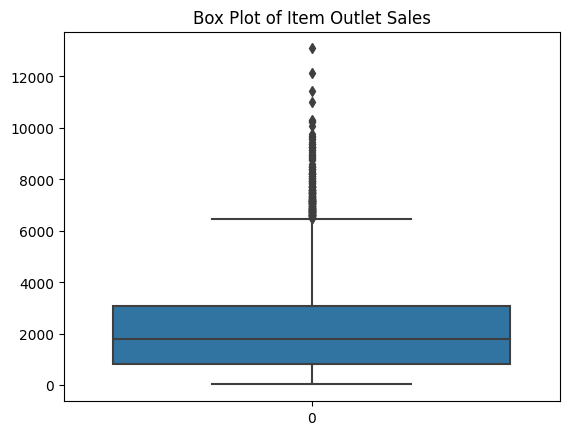

In [107]:
#BoxPlot of Our target Variable to use outliers 
plt.title("Box Plot of Item Outlet Sales")
sns.boxplot( data=sales_data['Item_Outlet_Sales'])
print(sales_data.shape)

In [108]:
#As there are alot of ouliers in this data therefore we should remove this
sales_data = sales_data[sales_data['Item_Outlet_Sales'] < 6200]
print(sales_data.shape)

(8285, 12)


<Figure size 1000x800 with 0 Axes>

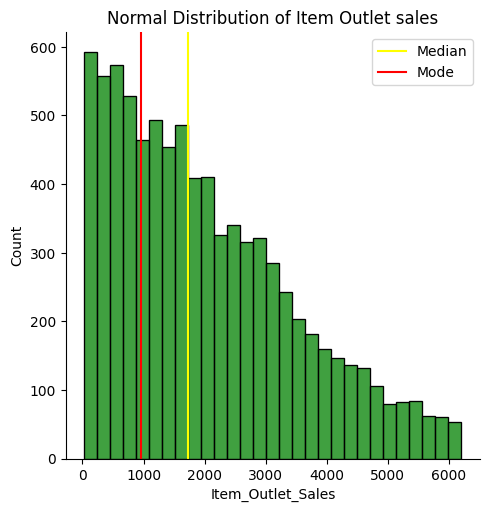

In [109]:
#Normal Distribution of our target variable ('Item outlet sales)
plt.figure(figsize=(10,8))
sns.displot(sales_data['Item_Outlet_Sales'] , color='green' )
plt.title("Normal Distribution of Item Outlet sales")
plt.axvline(sales_data['Item_Outlet_Sales'].median(), color='yellow', label='Median' )
plt.axvline(sales_data['Item_Outlet_Sales'].mode().values[0], color='red', label='Mode')
plt.legend()

(8285, 12)


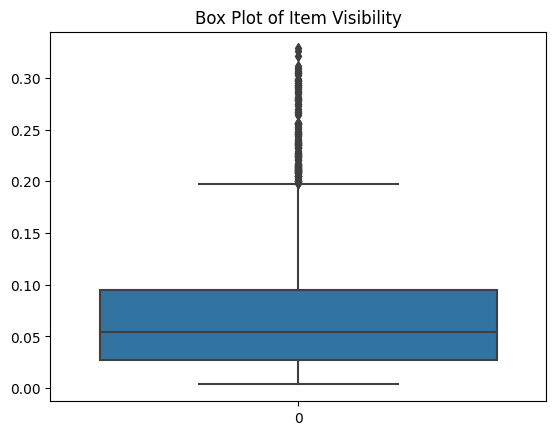

In [110]:
plt.title('Box Plot of Item Visibility')
sns.boxplot(data = sales_data['Item_Visibility'])
print(sales_data.shape)

In [111]:
#as there outliers exits above 0.19 value so we will keep tuples that have values less than 0.19
sales_data = sales_data[sales_data['Item_Visibility'] < 0.19]
print(sales_data.shape)

(8125, 12)


<Figure size 1000x800 with 0 Axes>

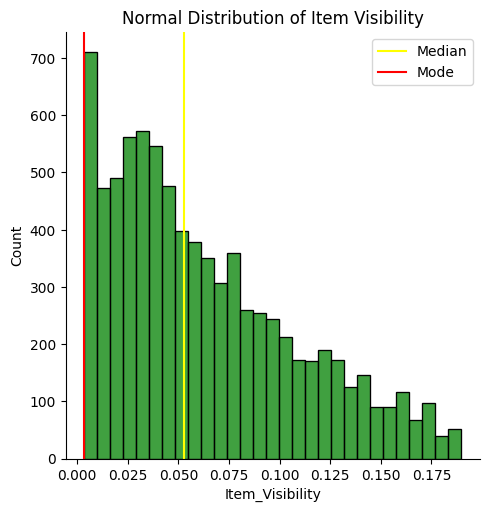

In [112]:
#Normal Distribution of our target variable (Item Visibility)
plt.figure(figsize=(10,8))
sns.displot(sales_data['Item_Visibility'] , color='green' )
plt.title("Normal Distribution of Item Visibility")
plt.axvline(sales_data['Item_Visibility'].median(), color='yellow', label='Median' )
plt.axvline(sales_data['Item_Visibility'].mode().values[0], color='red', label='Mode')
plt.legend()

(8125, 12)


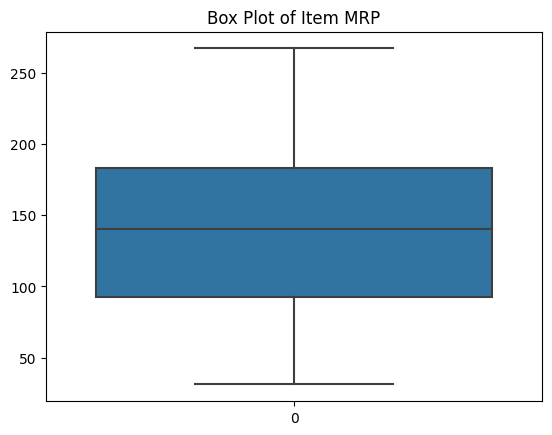

In [113]:
plt.title('Box Plot of Item MRP')
sns.boxplot(data = sales_data['Item_MRP'])
print(sales_data.shape)

<ipython-input-114-5d41147073a0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_MRP'] , color='green' )


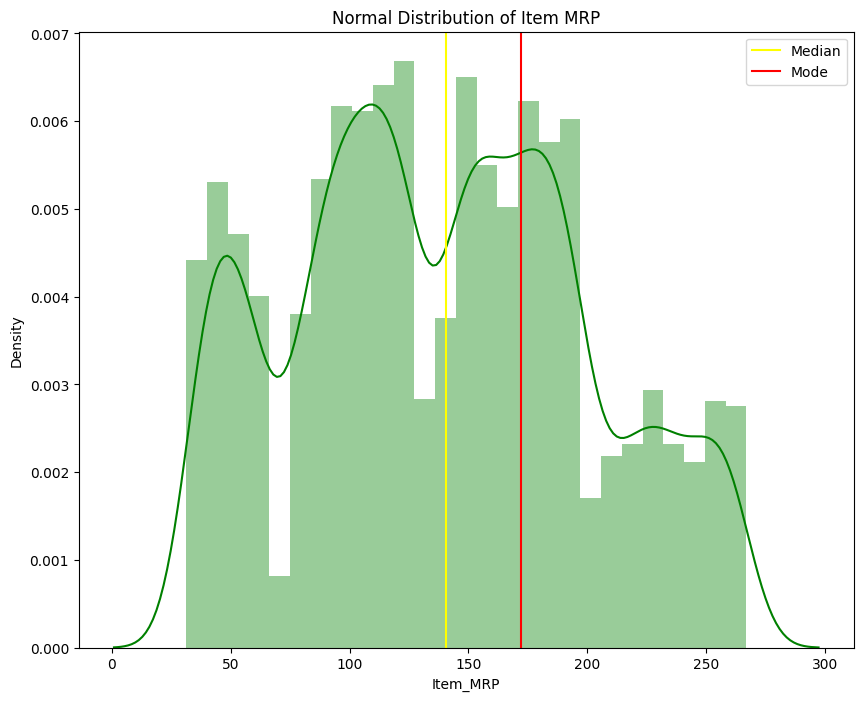

In [114]:
#no outliers
#Normal Distribution of our target variable (Item Visibility)
plt.figure(figsize=(10,8))
sns.distplot(sales_data['Item_MRP'] , color='green' )
plt.title("Normal Distribution of Item MRP")
plt.axvline(sales_data['Item_MRP'].median(), color='yellow', label='Median' )
plt.axvline(sales_data['Item_MRP'].mode().values[0], color='red', label='Mode')
plt.legend()

(8125, 12)


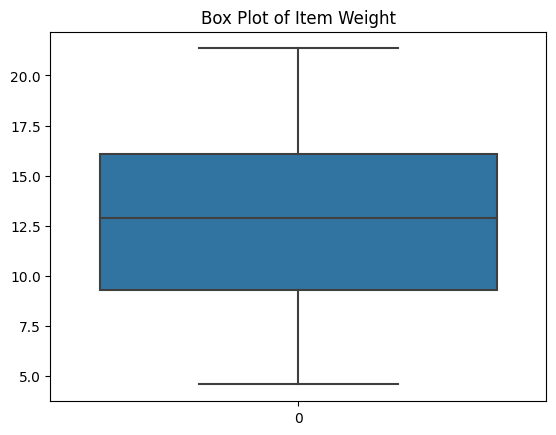

In [115]:
plt.title('Box Plot of Item Weight')
sns.boxplot(data = sales_data['Item_Weight'])
print(sales_data.shape)

<ipython-input-116-62039d141035>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_Weight'] , color='green' )


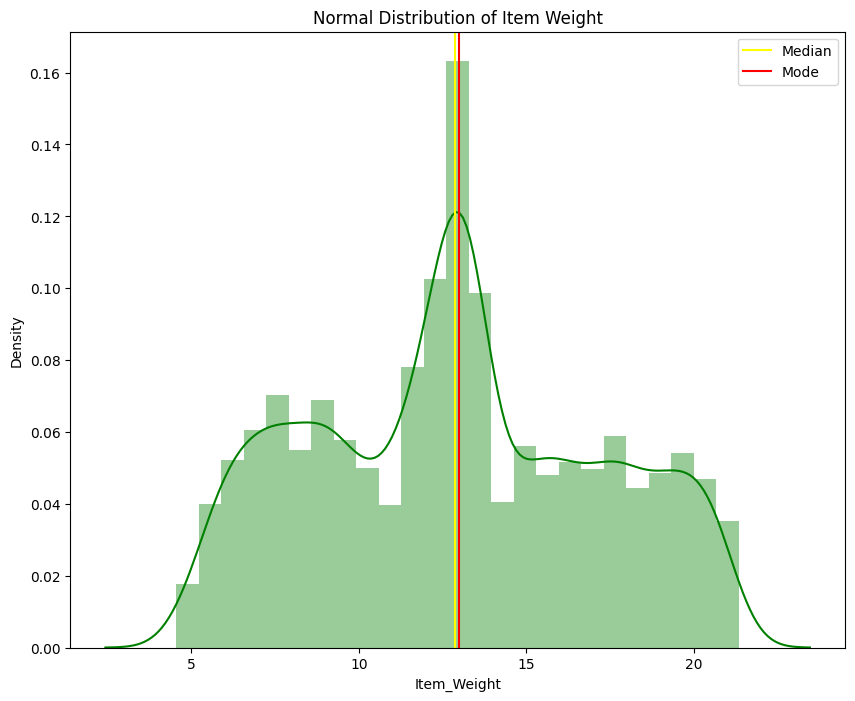

In [116]:
#no outliers
#Normal Distribution of our target variable (Item Visibility)
plt.figure(figsize=(10,8))
sns.distplot(sales_data['Item_Weight'] , color='green' )
plt.title("Normal Distribution of Item Weight")
plt.axvline(sales_data['Item_Weight'].median(), color='yellow', label='Median' )
plt.axvline(sales_data['Item_Weight'].mode().values[0], color='red', label='Mode')
plt.legend()

In [117]:
sales_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20000,Regular,0.003575,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93000,Low Fat,0.003575,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.39500,Regular,0.003575,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.65000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.98788,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [118]:
print(sales_data['Item_Fat_Content'].value_counts()) #only this feature should be corrected
print(sales_data['Item_Type'].value_counts())
print(sales_data['Outlet_Size'].value_counts())
print(sales_data['Outlet_Type'].value_counts())

Low Fat    4859
Regular    2744
LF          302
reg         114
low fat     106
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1163
Snack Foods              1143
Household                 874
Frozen Foods              822
Dairy                     643
Canned                    623
Baking Goods              618
Health and Hygiene        502
Soft Drinks               423
Meat                      408
Breads                    239
Hard Drinks               205
Others                    166
Starchy Foods             137
Breakfast                  99
Seafood                    60
Name: Item_Type, dtype: int64
Medium    4897
Small     2313
High       915
Name: Outlet_Size, dtype: int64
Supermarket Type1    5468
Grocery Store         923
Supermarket Type2     917
Supermarket Type3     817
Name: Outlet_Type, dtype: int64


In [119]:
sales_data['Item_Fat_Content'] = sales_data['Item_Fat_Content'].replace('LF', 'Low Fat')
sales_data['Item_Fat_Content'] = sales_data['Item_Fat_Content'].replace('reg', 'Regular')
sales_data['Item_Fat_Content'] = sales_data['Item_Fat_Content'].replace('low fat', 'Low Fat')
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5267
Regular    2858
Name: Item_Fat_Content, dtype: int64

<Axes: title={'center': 'Count plot of Item Fat Content'}, xlabel='Item_Fat_Content', ylabel='count'>

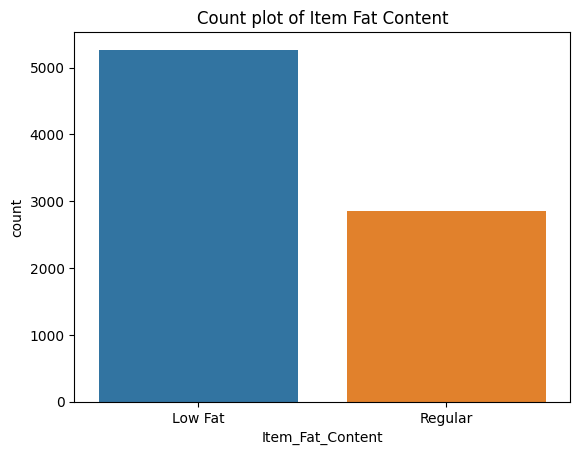

In [120]:

plt.title('Count plot of Item Fat Content')
sns.countplot(x=sales_data['Item_Fat_Content'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

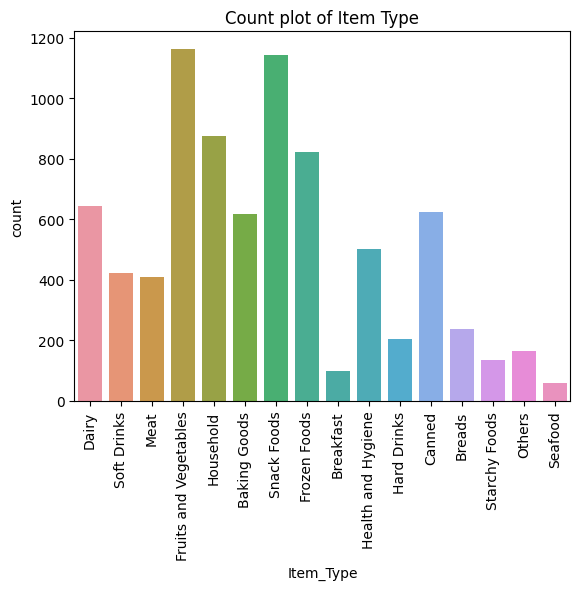

In [121]:
plt.title('Count plot of Item Type')
sns.countplot(x=sales_data['Item_Type'] )
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Medium'), Text(1, 0, 'High'), Text(2, 0, 'Small')])

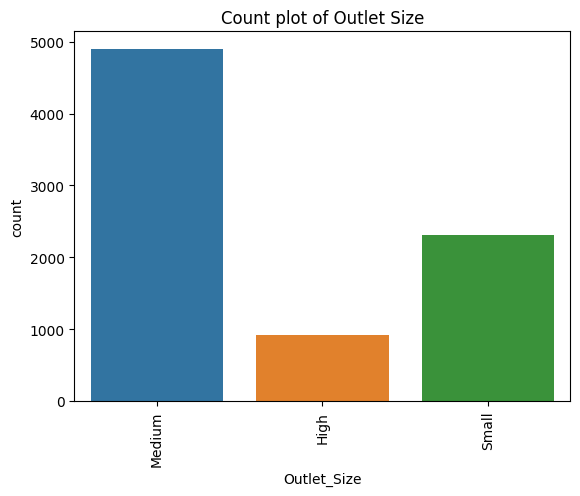

In [122]:
plt.title('Count plot of Outlet Size')
sns.countplot(x=sales_data['Outlet_Size'] )
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

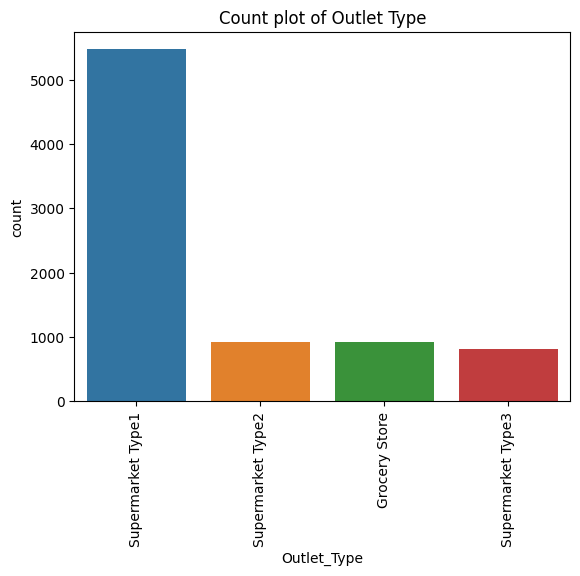

In [123]:

plt.title('Count plot of Outlet Type')
sns.countplot(x=sales_data['Outlet_Type'] )
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1985'),
  Text(1, 0, '1987'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2002'),
  Text(6, 0, '2004'),
  Text(7, 0, '2007'),
  Text(8, 0, '2009')])

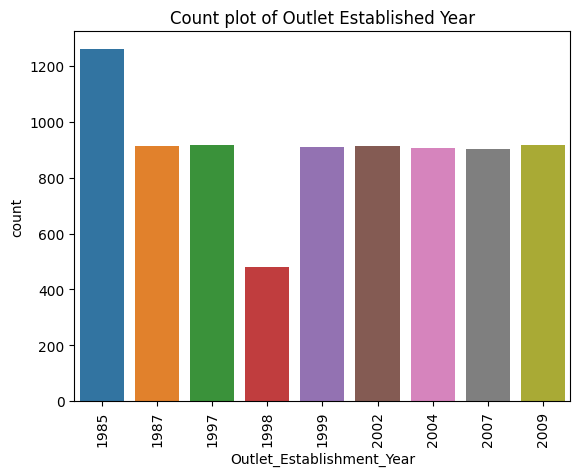

In [124]:
plt.title('Count plot of Outlet Established Year')
sns.countplot(x=sales_data['Outlet_Establishment_Year'] )
plt.xticks(rotation=90)

<ipython-input-125-049d062f165a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sales_data.corr(), annot=True)


<Axes: >

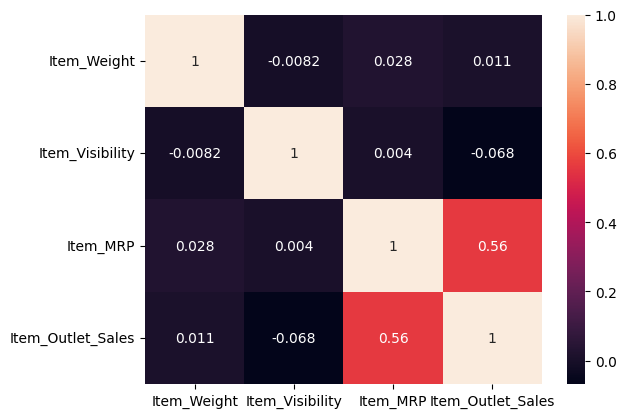

In [125]:

sns.heatmap(sales_data.corr(), annot=True)

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

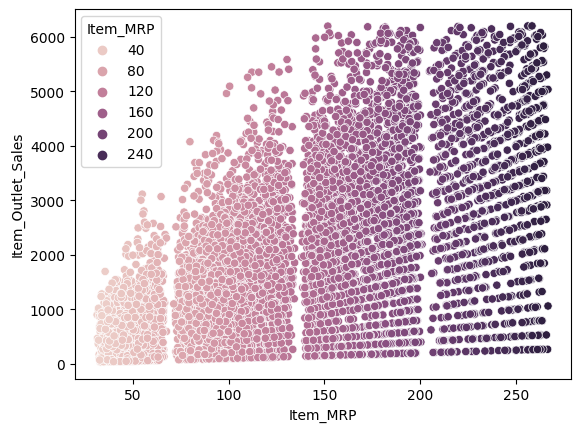

In [126]:
sns.scatterplot(data=sales_data, x=sales_data['Item_MRP'], y=sales_data['Item_Outlet_Sales'], hue=sales_data['Item_MRP'])

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

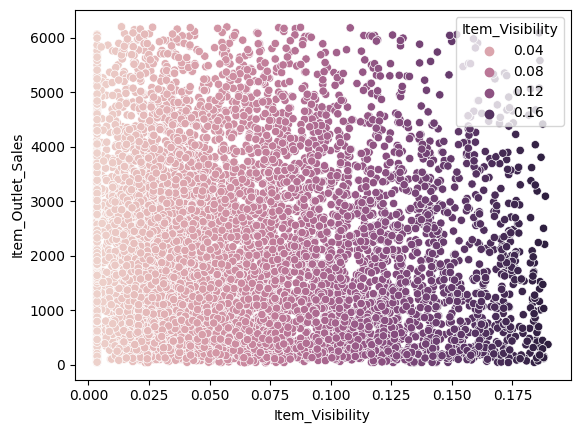

In [127]:
sns.scatterplot(data=sales_data, x=sales_data['Item_Visibility'], y=sales_data['Item_Outlet_Sales'], hue=sales_data['Item_Visibility'])

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

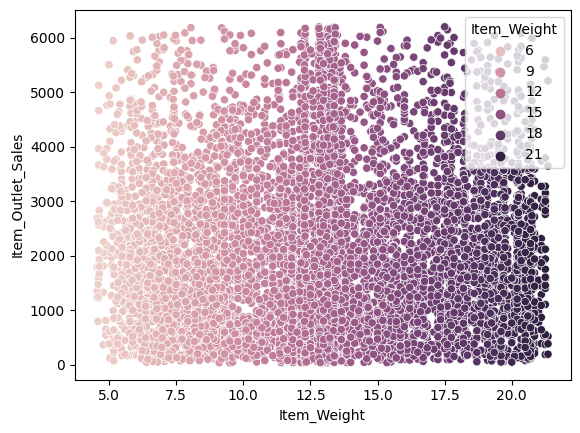

In [128]:
sns.scatterplot(data=sales_data, x=sales_data['Item_Weight'], y=sales_data['Item_Outlet_Sales'], hue=sales_data['Item_Weight'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

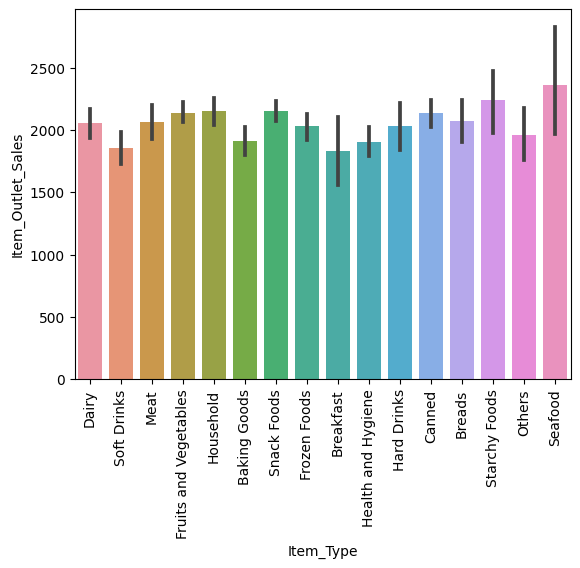

In [129]:
sns.barplot(x=sales_data['Item_Type'], y=sales_data['Item_Outlet_Sales'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

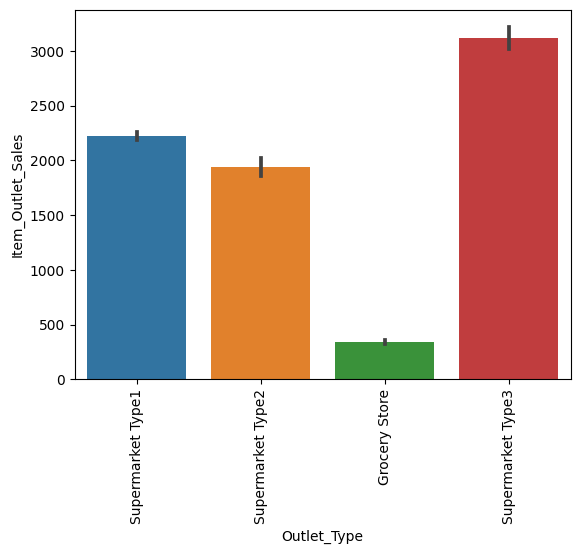

In [130]:
sns.barplot(x=sales_data['Outlet_Type'], y=sales_data['Item_Outlet_Sales'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1985'),
  Text(1, 0, '1987'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2002'),
  Text(6, 0, '2004'),
  Text(7, 0, '2007'),
  Text(8, 0, '2009')])

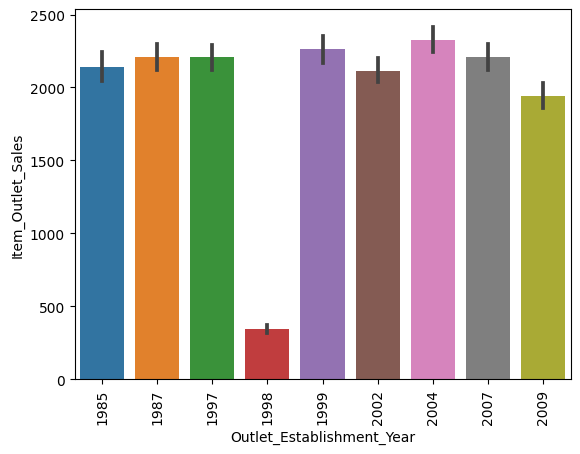

In [131]:
sns.barplot(x=sales_data['Outlet_Establishment_Year'], y=sales_data['Item_Outlet_Sales'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT013'),
  Text(4, 0, 'OUT027'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT046'),
  Text(8, 0, 'OUT035'),
  Text(9, 0, 'OUT019')])

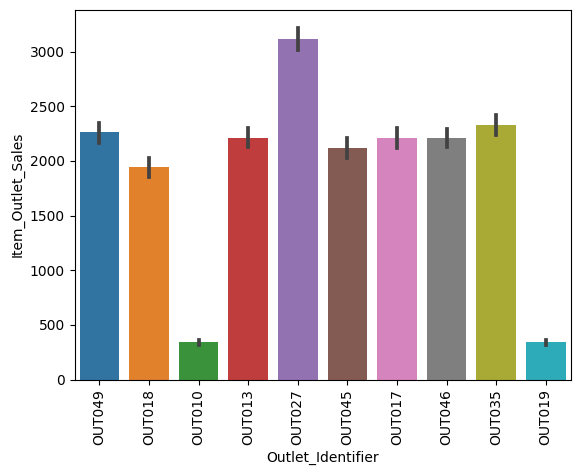

In [132]:
sns.barplot(x=sales_data['Outlet_Identifier'], y=sales_data['Item_Outlet_Sales'])
plt.xticks(rotation=90)

In [133]:
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.003575,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.003575,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [134]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_encoder=LabelEncoder()
sales_data['Item_Fat_Content'] = label_encoder.fit_transform(sales_data['Item_Fat_Content'])


In [135]:
col_for_encode = ['Item_Type','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'Outlet_Identifier']
sales_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [136]:
encode_data =pd.get_dummies(sales_data[col_for_encode])

sales_data = pd.concat([sales_data, encode_data], axis=1)

sales_data= sales_data.drop(col_for_encode, axis=1)

<ipython-input-136-9a8f53744fbb>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  encode_data =pd.get_dummies(sales_data[col_for_encode])


In [137]:
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,9.300,0,0.016047,249.8092,3735.1380,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.920,1,0.019278,48.2692,443.4228,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.500,0,0.016760,141.6180,2097.2700,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.200,1,0.003575,182.0950,732.3800,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,0,0.003575,53.8614,994.7052,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,214.5218,2778.3834,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,FDS36,8.380,1,0.046982,108.1570,549.2850,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,NCJ29,10.600,0,0.035186,85.1224,1193.1136,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8521,FDN46,7.210,1,0.145221,103.1332,1845.5976,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [138]:
X = sales_data.drop(['Item_Identifier', 'Item_Outlet_Sales'], axis=1)
Y= sales_data['Item_Outlet_Sales']


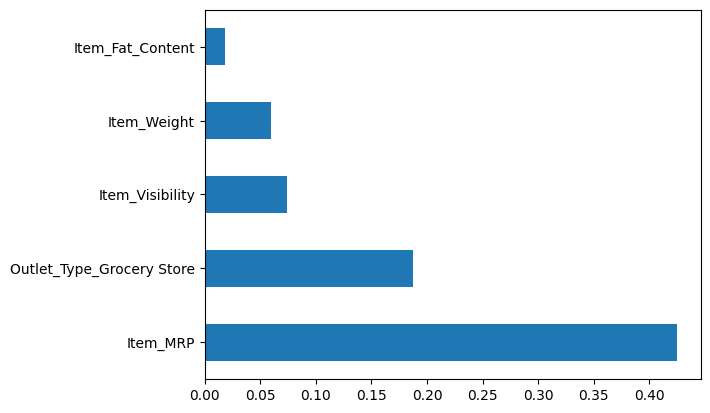

In [139]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

# To look at the best features
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest().plot(kind='barh')
plt.show()

In [140]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)


In [141]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [142]:
y_prediction = linear_reg.predict(x_test) 
print(y_prediction)

[2541.25271293 3106.79027604 1030.51893787 ... 2707.61682842 2847.1278411
 1816.70800922]


In [143]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

MSE=mean_squared_error(y_test,y_prediction)
MAE=mean_absolute_error(y_test,y_prediction)
r2=r2_score(y_test,y_prediction)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)

R squared value:  0.5261859903011217
Root Mean Squared Error :  1000.8756696691162
Mean Absolute Error :  771.3474929560845


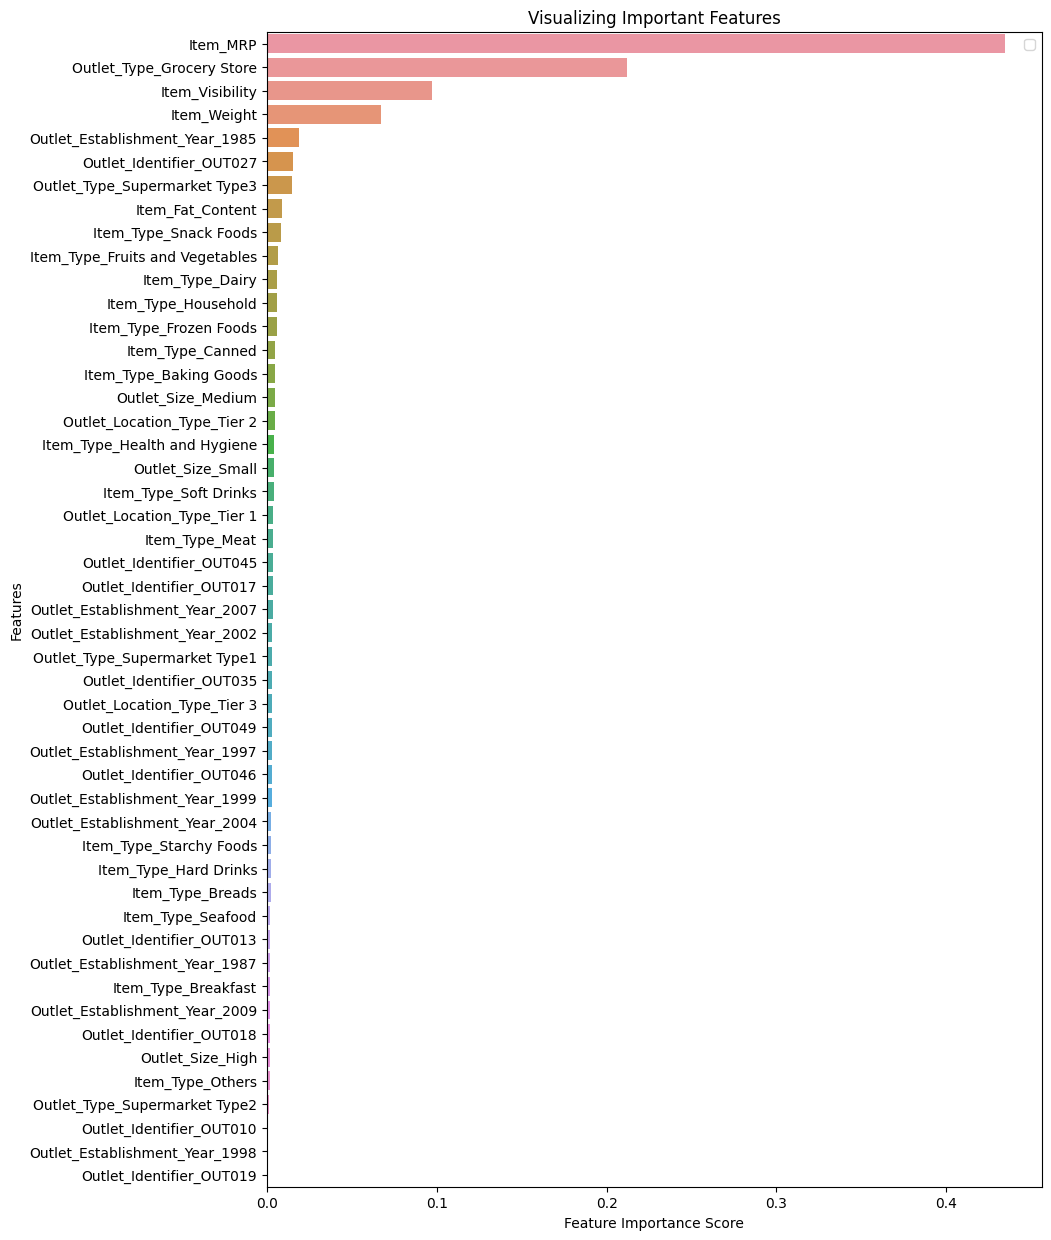

In [144]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=100)
reg.fit(x_train,y_train)

feature_imp = pd.Series(reg.feature_importances_,index=x_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,15))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [145]:
rf_prediction = reg.predict(x_test)

In [146]:
MSE=mean_squared_error(y_test,rf_prediction)
MAE=mean_absolute_error(y_test,rf_prediction)
r2=r2_score(y_test,rf_prediction)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)

R squared value:  0.5116616530896638
Root Mean Squared Error :  1016.1003420798679
Mean Absolute Error :  735.0258476899097


**Testing Phase**

In [185]:
test_data = pd.read_csv('/content/test_FewQE9B.csv')

In [186]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [187]:
total_missing_value_per = ((test_data.isnull().sum()).sum()/ test_data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_missing_value_per,2)}%')
missing_percentages = test_data.isnull().sum()/ len(test_data) * 100 

print(missing_percentages)

The total percentage of missing data is 45.45%
Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64


In [191]:
class_mean = test_data.groupby('Item_Type')['Item_Weight'].mean()
print(class_mean)

Item_Type
Baking Goods             12.272418
Breads                   10.866799
Breakfast                13.759603
Canned                   12.393565
Dairy                    12.955040
Frozen Foods             12.101543
Fruits and Vegetables    13.146659
Hard Drinks              11.844417
Health and Hygiene       13.216929
Household                13.270504
Meat                     12.702148
Others                   14.009725
Seafood                  13.241136
Snack Foods              12.684256
Soft Drinks              11.691965
Starchy Foods            13.618247
Name: Item_Weight, dtype: float64


In [192]:

for index, row in test_data.iterrows():
    if pd.isnull(row['Item_Weight']):
        class_value = row['Item_Type']
        if class_value in class_mean:
            test_data.at[index, 'Item_Weight'] = class_mean[class_value]

In [194]:
categorical_column = 'Outlet_Size'
specific_column = 'Item_Type'

# Calculate mode values for the categorical column based on the specific column
mode_values = test_data.groupby(specific_column)[categorical_column].apply(lambda x: x.mode()[0])


In [195]:

# Calculate mode values for the categorical column based on the specific column
mode_values = test_data.groupby(specific_column)[categorical_column].apply(lambda x: x.mode()[0])
for index, row in test_data.iterrows():
    # Check if the categorical column has a null value
    if pd.isnull(row[categorical_column]):
        specific_value = row[specific_column]
        # Fill null value with the mode value for the respective specific value
        if specific_value in mode_values:
            test_data.at[index, categorical_column] = mode_values[specific_value]

In [196]:
test_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [198]:
test_data['Outlet_Establishment_Year'] = test_data['Outlet_Establishment_Year'].astype('object')
test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [200]:
test_data['Item_Visibility'] = test_data['Item_Visibility'].replace(0.000000, 0.003574698)

(5681, 11)


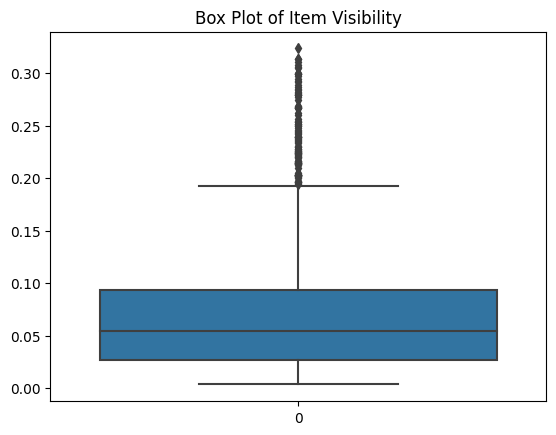

In [201]:
plt.title('Box Plot of Item Visibility')
sns.boxplot(data = test_data['Item_Visibility'])
print(test_data.shape)

In [202]:
test_data = test_data[test_data['Item_Visibility'] < 0.19]
print(test_data.shape)

(5567, 11)


In [204]:
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace('LF', 'Low Fat')
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace('reg', 'Regular')
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace('low fat', 'Low Fat')
test_data['Item_Fat_Content'].value_counts()

Low Fat    3603
Regular    1964
Name: Item_Fat_Content, dtype: int64

In [206]:

test_data['Item_Fat_Content'] = label_encoder.fit_transform(test_data['Item_Fat_Content'])
col_for_encode = ['Item_Type','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'Outlet_Identifier']

encode_data =pd.get_dummies(test_data[col_for_encode])

test_data = pd.concat([test_data, encode_data], axis=1)

test_data= test_data.drop(col_for_encode, axis=1)

<ipython-input-206-28932762a285>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  encode_data =pd.get_dummies(test_data[col_for_encode])


In [207]:
test_data.drop('Item_Identifier',axis=1,inplace=True)

In [208]:
test_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,20.75000,0,0.007565,107.8622,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,8.30000,1,0.038428,87.3198,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,14.60000,0,0.099575,241.7538,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,7.31500,0,0.015388,155.0340,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,12.95504,1,0.118599,234.2300,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [210]:
lin_predict = linear_reg.predict(test_data)